# 1. Regresi Linear Sederhana

Lakukan analisis regresi linear sederhana menggunakan dataset Students Performance.

Variabel yang digunakan adalah:

X (independen) : jam belajar (study hours)

Y (dependen) : nilai (score)

Instruksi:

* Impor dataset Students Performance ke dalam Colab.

* Lakukan eksplorasi data sederhana (tampilkan 5 data pertama, deskripsi statistik, dan cek apakah ada nilai kosong).

* Visualisasikan hubungan antara umur rumah dan harga rumah menggunakan scatter plot.

* Bangun model regresi linear sederhana untuk memprediksi harga rumah berdasarkan umur rumah.

* Tampilkan hasil model, termasuk persamaan regresi (koefisien dan intercept) dan evaluasi

* Buat visualisasi garis regresi pada scatter plot.

* Berikan analisis terhadap hasil model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
stud = pd.read_csv('Students Performance.csv', sep = ';')

In [6]:
stud.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
stud.isna().sum()

,0
Hours,0
Scores,0


In [8]:
stud.head()

,Hours,Scores
0,1.1,17
1,1.5,20
2,1.9,24
3,2.5,21
4,2.5,30


In [9]:
stud.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


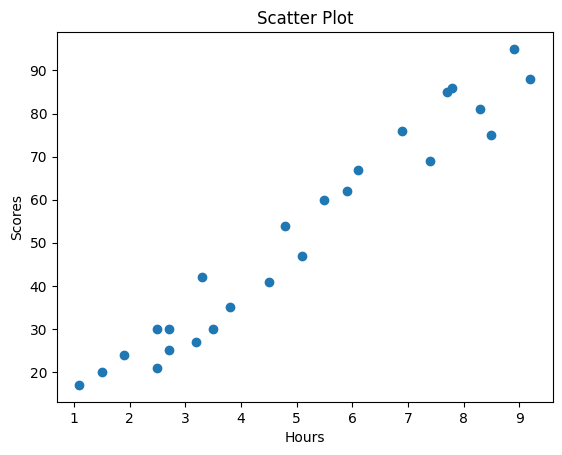

In [10]:
plt.scatter(stud['Hours'], stud['Scores'])

plt.title('Scatter Plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

X = stud[['Hours']].values
y = stud['Scores'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
y_pred = model.predict(X)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 9.775803390787472
Intercept: 2.483673405373196


In [12]:
print(f"y = {intercept} + {slope} * x")

y = 2.483673405373196 + 9.775803390787472 * x


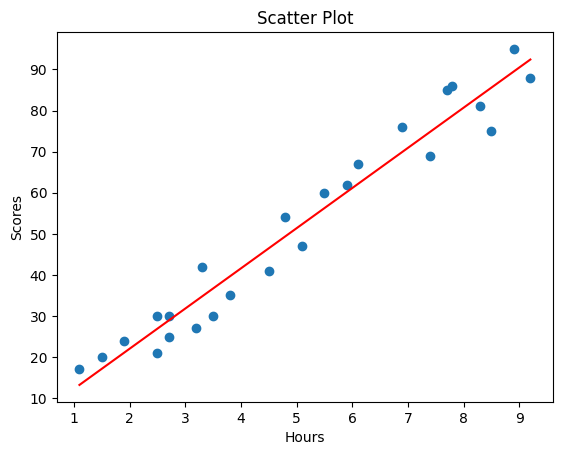

In [13]:
plt.scatter(stud['Hours'], stud['Scores'])
plt.plot(stud['Hours'], y_pred, color='red')

plt.title('Scatter Plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

X = stud['Hours'].values
y = stud['Scores'].values

mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 28.882730509245466
RMSE: 5.374265578592619


dari RMSE dapat dilihat bahwa rata-rata kesalahan prediksi nilai skor sekitar kurang lebih 5.

# 3. Regresi Non Linear

Lakukan analisis regresi non linear menggunakan dataset Body Mass.

Variabel yang digunakan adalah berat badan (weight) dan tinggi badan (height).

Instruksi:

* Impor dataset Body Mass ke dalam Colab.

* Lakukan eksplorasi data sederhana (tampilkan 5 data pertama, deskripsi statistik, dan cek apakah ada nilai kosong).

* Visualisasikan hubungan antara berat dan tinggi badan.

* Tampilkan hasil model, termasuk persamaan regresi (koefisien dan intercept) dan evaluasi

* Buat visualisasi garis regresi pada scatter plot.

* Berikan analisis terhadap hasil model

In [15]:
body = pd.read_csv('Weight-Height Polynomial Dataset.csv')

In [16]:
body.columns

Index(['Weight', 'Height'], dtype='object')

In [17]:
body.isna().sum()

,0
Weight,0
Height,0


In [18]:
body.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


In [19]:
body.describe()

,Weight,Height
count,50.000000,50.000000
mean,75.673912,111.473633
std,23.110656,39.493803
min,41.646760,68.971292
25%,54.701360,79.966731
50%,74.883900,98.819101
75%,91.988395,129.709758
max,117.592788,202.663424


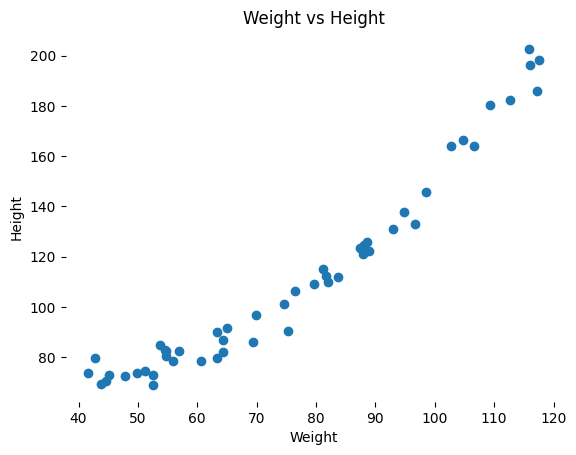

In [20]:
plt.scatter(body['Weight'], body['Height'])
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.box(False)
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = body[['Weight']].values
y = body['Height'].values

pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [22]:
y_pred_poly = lr.predict(X_poly)

/tmp/ipython-input-2206271068.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


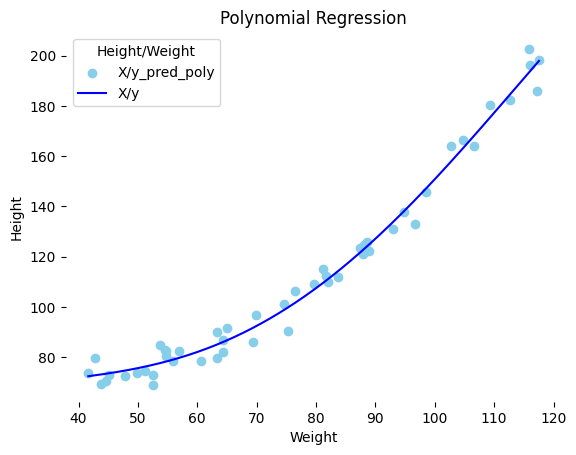

In [23]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'skyblue')
plt.plot(X_grid, lr.predict(pr.transform(X_grid)), color = 'blue')

plt.title('Polynomial Regression')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Height/Weight', loc='best', facecolor='white')

plt.box(False)
plt.show()

In [24]:
print("Koef       :", lr.coef_)
print("Intercept  :", lr.intercept_)
print("Polinomial :", pr.get_feature_names_out())

Koef       : [ 0.00000000e+00  2.44774930e+00 -6.63300815e-02  7.99153529e-04
 -2.65609602e-06]
Intercept  : 35.801546439414636
Polinomial : ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred_poly)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y, y_pred_poly)
print("R2:", r2)

MSE: 20.213645711602545
RMSE: 4.495958820051908
R2: 0.9867760665388534


# 5. Interpolasi Linear

Disajikan sejumlah data

X = 3, 6, 11, 7, 18, 22, 5, 8, 10, 25

y = 2, 5, 15, 20, 27, 31, 24, 17, 18, 9

Gunakan interpolasi linear untuk menentukan nilai y apabila x=21. Tunjukkan pula rumus interpolasi tiap titiknya.

In [26]:
X = np.array([3, 6, 11, 7, 18, 22, 5, 8, 10, 25])
y = np.array([2, 5, 15, 20, 27, 31, 14, 17, 18, 9])

In [27]:
X_interp = np.linspace(np.min(X), np.max(X), 50)

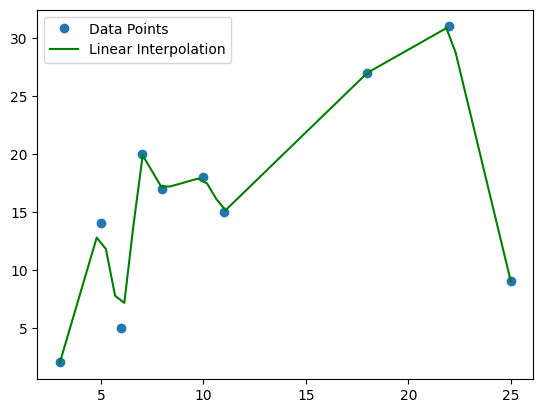

In [28]:
from scipy.interpolate import interp1d, CubicSpline

y_linear = interp1d(X, y, kind="linear" )

plt.plot(X, y, "o", label="Data Points")
plt.plot(X_interp, y_linear(X_interp), "green", label="Linear Interpolation")
plt.legend()
plt.show()

In [29]:
print(y_linear(21))

30.0


In [30]:
def linear_segments(X, y):
    formulas = []
    for i in range(len(X)-1):
        x0, x1 = X[i], X[i+1]
        y0, y1 = y[i], y[i+1]
        # slope (gradien)
        m = (y1 - y0) / (x1 - x0)
        # intercept
        c = y0 - m*x0
        formulas.append((x0, x1, m, c))
    return formulas

# Hitung rumus interpolasi tiap segmen
segments = linear_segments(X, y)

# Cetak rumusnya
for (x0, x1, m, c) in segments:
    print(f"Untuk {x0} <= x <= {x1} : y = {m:.3f}x + {c:.3f}")

Untuk 3 <= x <= 6 : y = 1.000x + -1.000
Untuk 6 <= x <= 11 : y = 2.000x + -7.000
Untuk 11 <= x <= 7 : y = -1.250x + 28.750
Untuk 7 <= x <= 18 : y = 0.636x + 15.545
Untuk 18 <= x <= 22 : y = 1.000x + 9.000
Untuk 22 <= x <= 5 : y = 1.000x + 9.000
Untuk 5 <= x <= 8 : y = 1.000x + 9.000
Untuk 8 <= x <= 10 : y = 0.500x + 13.000
Untuk 10 <= x <= 25 : y = -0.600x + 24.000


# 6. Interpolasi Kuadratik

Pada soal no 5, gunakan interpolasi kuadratiknya.

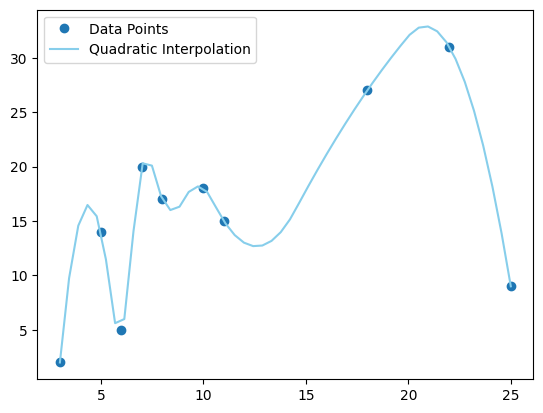

In [31]:
y_quadratic = interp1d(X, y, kind='quadratic')

plt.plot(X, y, "o", label="Data Points")
plt.plot(X_interp, y_quadratic(X_interp), "skyblue", label="Quadratic Interpolation")
plt.legend()
plt.show()

In [32]:
print(y_quadratic(21))

32.85562887848646


# 8. RNG Multinomial

Sebuah perusahaan ingin meluncurkan produk baru berupa minuman dan makanan ringan. Sebelum membuat, perusahaan melakukan survey terhadap konsumen dengan menguji tiap produk.

Minuman ringan :
* Teh botol
* Soda
* Isotonik

Makanan ringan :
* Keripik kentang
* Sosis siap saji
* Wafer
* Egg roll
* Keripik tempe

Survey minuman dilakukan terhadap 50 responden sedangkan makanan dilakukan terhadap 60 responden. Gunakan distribusi binomial untuk menentukan produk apa yang akan diluncurkan berdasarkan hasilnya? Jelaskan jawabanmu.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

rng.multinomial([50, 60], [[1/3.]*3 + [0]*2, [1/5.]*5])

array([[15, 16, 19,  0,  0],
       [13, 12, 14, 15,  6]])

Berdasarkan hasil distribusi, didapatkan bahwa minuman ringan yang paling banyak dipilih adalah isotonik dengan 19 responden. Sedangkan makanan ringan terbanyak yang paling banyak dipilih adalah eggroll dengan 15 responden.